In [1]:
import numpy as np
import torch
from torch.utils import data
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [2]:
'''
我们输入的X，有时候会有很多维度，一般我们都要对其进行reshape
这里可以加个flatten层，让pytorch帮我们做这件事情
具体就是:对于输入X，仅保留第0维，其他维度的数据全部展成一个向量
比如输入的是：10 * 28 * 28，就是10张图片，每张图片28*28个像素
'''
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m): # m是当前的layer
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights) # apply函数会对nn里面的每一层运行init_weight函数
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

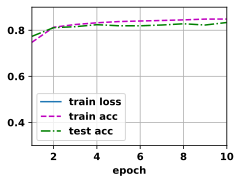

In [3]:
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)